# Crédito

## Carregar base de Dados

In [1]:
# Importação dos pacotes
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Seed para reprodução de resultados
seed = 1
random.seed(seed)
np.random.seed(seed)

In [2]:
data = pd.read_table('datasets/credito.txt')
data.head()

,ESTC,NDEP,RENDA,TIPOR,VBEM,NPARC,VPARC,TEL,IDADE,RESMS,ENTRADA,CLASSE
0,1,0,360,0,313,9,52,0,25,48,0,1
1,0,0,350,1,468,10,65,0,33,6,0,1
2,0,0,1100,0,829,9,125,0,56,48,0,1
3,0,0,3000,0,552,12,76,1,31,60,0,1
4,1,0,1000,0,809,12,111,0,24,7,0,1


In [3]:
data.tail()

,ESTC,NDEP,RENDA,TIPOR,VBEM,NPARC,VPARC,TEL,IDADE,RESMS,ENTRADA,CLASSE
2072,0,0,480,1,398,6,89,0,33,84,0,0
2073,1,0,773,0,699,6,131,0,63,48,0,0
2074,0,3,1200,0,495,4,145,0,39,6,0,1
2075,1,0,600,0,572,15,68,0,33,6,0,1
2076,0,0,800,1,429,10,60,0,29,6,0,0


In [4]:
# linhas 100 a 110, todas as colunas
data.iloc[100:111,:]

,ESTC,NDEP,RENDA,TIPOR,VBEM,NPARC,VPARC,TEL,IDADE,RESMS,ENTRADA,CLASSE
100,0,0,3400,1,1629,18,175,0,53,6,0,1
101,0,0,619,0,599,15,70,0,27,6,2,1
102,1,0,1600,0,383,1,404,0,29,48,0,1
103,0,0,700,1,485,10,74,0,33,6,0,0
104,0,0,1200,0,602,4,137,0,43,0,137,1
105,0,0,1700,1,314,2,107,0,39,108,107,0
106,0,0,600,1,738,10,102,0,32,6,0,1
107,1,0,300,0,452,12,62,1,37,144,0,1
108,1,0,500,0,450,4,114,0,45,48,0,1
109,0,2,740,1,480,10,67,0,34,6,0,1


In [5]:
data.shape

(2077, 12)

In [6]:
data.describe()

,ESTC,NDEP,RENDA,TIPOR,VBEM,NPARC,VPARC,TEL,IDADE,RESMS,ENTRADA,CLASSE
count,2077.000000,2077.000000,2077.000000,2077.000000,2077.000000,2077.000000,2077.000000,2077.000000,2077.000000,2077.000000,2077.000000,2077.000000
mean,0.521907,0.122292,969.541647,0.447280,563.794415,8.395282,102.666346,0.128069,41.204622,30.901300,30.664420,0.474723
std,0.674420,0.556507,897.707359,0.497333,292.360830,3.614923,64.315987,0.334247,13.276082,51.960972,93.356164,0.499481
min,0.000000,0.000000,300.000000,0.000000,300.000000,1.000000,50.000000,0.000000,18.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,470.000000,0.000000,404.000000,6.000000,66.000000,0.000000,31.000000,6.000000,0.000000,0.000000
50%,0.000000,0.000000,640.000000,0.000000,489.000000,10.000000,83.000000,0.000000,39.000000,6.000000,0.000000,0.000000
75%,1.000000,0.000000,1150.000000,1.000000,618.000000,10.000000,118.000000,0.000000,52.000000,48.000000,0.000000,1.000000
max,3.000000,7.000000,9675.000000,1.000000,6000.000000,24.000000,719.000000,1.000000,70.000000,420.000000,1300.000000,1.000000


## Separar base em treino e teste

In [7]:
from sklearn.model_selection import train_test_split 
# Agora usaremos a função para fazer de fato a separação. Já faremos a separação em treino e teste e entrada e saída.
X = data.loc[:,data.columns != 'CLASSE']  # Entrada
y = data.CLASSE    # Saída
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    stratify=y)

In [8]:
y.value_counts()

0    1091
1     986
Name: CLASSE, dtype: int64

In [9]:
# Verificar proporção para teste para confirmar amostragem estratificada
print(0.2*y.value_counts()[0])
print(0.2*y.value_counts()[1])

218.20000000000002
197.20000000000002


In [10]:
y_test.value_counts()

0    219
1    197
Name: CLASSE, dtype: int64

In [11]:
y_train.value_counts()

0    872
1    789
Name: CLASSE, dtype: int64

In [12]:
# Vamos olhar os shapes da bases de treino e teste
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1661, 11)
(416, 11)
(1661,)
(416,)


##Pré Processamento

###Missing

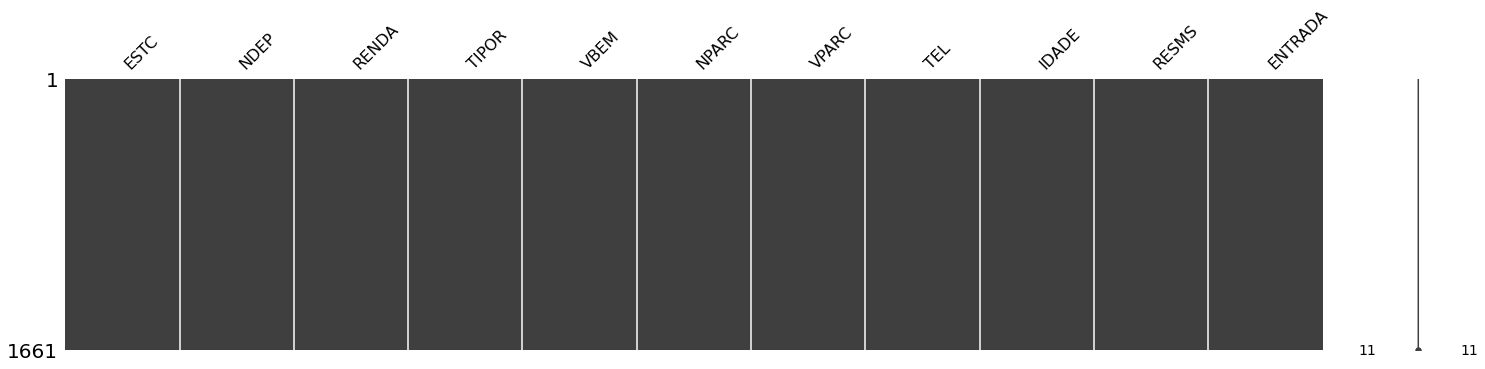

In [13]:
# Visualizar missing
import missingno as msno
msno.matrix(X_train, figsize=(25,5));

Não temos nenhum missing!

In [14]:
# remover colunas com variância zero
from sklearn.feature_selection import VarianceThreshold
zero_var_filter = VarianceThreshold()
X_train = zero_var_filter.fit_transform(X_train)

In [15]:
# colunas com variância zero
(zero_var_filter.variances_ == 0).sum()

0

In [16]:
# novo shape
pd.DataFrame(X_train).shape

(1661, 11)

Não temos nenhuma coluna com variância zero!

##Machine Learning

In [17]:
# treinar modelo
from sklearn.svm import SVC

def train(X_train, y_train, seed):
  model = SVC(random_state=seed)  # crio o modelo
  model.fit(X_train, y_train)     # treino o modelo
  return model

model = train(X_train, y_train, seed)

### Avaliar modelo treinado na base de teste

In [18]:
X_test.shape

(416, 11)

In [19]:
# remover as mesmas colunas removidas por variância zero. Nesse caso não houveram tais atributos. Deixo o código caso tenham um caso que ocorra. Aqui não fará nenhuma diferença.
X_test = zero_var_filter.transform(X_test)
X_test.shape

(416, 11)

In [20]:
def predict_and_evaluate(model, X_test, y_test):

  y_pred = model.predict(X_test) # inferência do teste

  # Acurácia
  from sklearn.metrics import accuracy_score
  accuracy = accuracy_score(y_test, y_pred)
  print('Acurácia: ', accuracy)

  # Kappa
  from sklearn.metrics import cohen_kappa_score
  kappa = cohen_kappa_score(y_test, y_pred)
  print('Kappa: ', kappa)

  # F1
  from sklearn.metrics import f1_score
  f1 = f1_score(y_test, y_pred)
  print('F1: ', f1)

  # Matriz de confusão
  from sklearn.metrics import confusion_matrix
  confMatrix = confusion_matrix(y_test, y_pred)

  ax = plt.subplot()
  sns.heatmap(confMatrix, annot=True, fmt=".0f")
  plt.xlabel('Previsto')
  plt.ylabel('Real')
  plt.title('Matriz de Confusão')

  # Colocar os nomes
  ax.xaxis.set_ticklabels(['Não Pagou', 'Pagou']) 
  ax.yaxis.set_ticklabels(['Não Pagou', 'Pagou'])
  plt.show()


Resultados de Treino
Acurácia:  0.6381697772426249
Kappa:  0.2657140608415306
F1:  0.5641769398114576


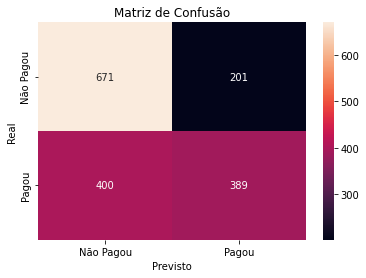

Resultados de Teste
Acurácia:  0.5961538461538461
Kappa:  0.17873510540788262
F1:  0.5058823529411763


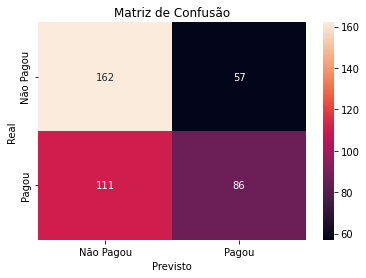

In [21]:
print('Resultados de Treino')
predict_and_evaluate(model, X_train, y_train)

print('Resultados de Teste')
predict_and_evaluate(model, X_test, y_test)

###Normalizar

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train) # gero o modelo de pré-processamento no treino
X_train = scaler.transform(X_train) # aplico o modelo no treino
X_test = scaler.transform(X_test)   # aplico o modelo no teste

Resultados de Treino
Acurácia:  0.8970499698976521
Kappa:  0.7915856764544669
F1:  0.879492600422833


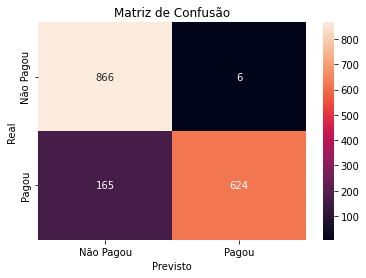

Resultados de Teste
Acurácia:  0.8822115384615384
Kappa:  0.7611436606515116
F1:  0.8603988603988605


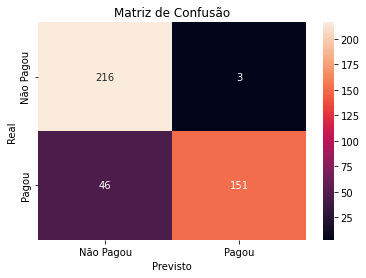

In [23]:
# Treinar e Testar novamente
model = train(X_train, y_train, seed)
print('Resultados de Treino')
predict_and_evaluate(model, X_train, y_train)
print('Resultados de Teste')
predict_and_evaluate(model, X_test, y_test)

##Grid Search

In [24]:
from sklearn.model_selection import GridSearchCV

# Definir parâmetros a serem utilizados
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]
                     
# Executar o grid search
model = GridSearchCV(SVC(probability=True), tuned_parameters, scoring='f1')
model.fit(X_train, y_train);

In [25]:
model.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

Resultados de Treino
Acurácia:  0.8982540638169777
Kappa:  0.7942237896648968
F1:  0.8822299651567944


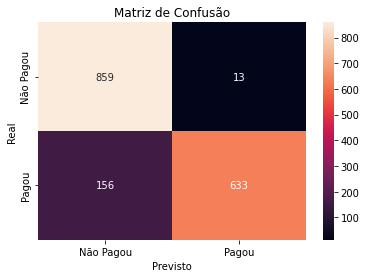

Resultados de Teste
Acurácia:  0.8822115384615384
Kappa:  0.7615125421190565
F1:  0.8627450980392157


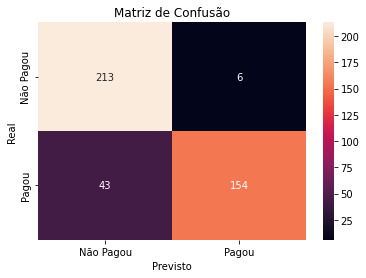

In [26]:
print('Resultados de Treino')
predict_and_evaluate(model, X_train, y_train)
print('Resultados de Teste')
predict_and_evaluate(model, X_test, y_test)

# Inferir novos dados com modelo treinado!

In [27]:
# 1. Carreguei os dados sem o rótulo
new_data = pd.read_table('datasets/credito_sem_rotulo.txt')
new_data.head(8)

,ESTC,NDEP,RENDA,TIPOR,VBEM,NPARC,VPARC,TEL,IDADE,RESMS,ENTRADA
0,1,0,400,0,399,6,89,0,19,24,0
1,1,0,650,1,480,10,67,0,21,6,0
2,2,0,600,1,544,3,149,1,49,12,149
3,1,0,360,0,313,9,52,0,25,48,0
4,0,0,350,1,468,10,65,0,33,6,0
5,0,0,1100,0,829,9,125,0,56,48,0
6,0,0,3000,0,552,12,76,1,31,60,0
7,1,0,1000,0,809,12,111,0,24,7,0


In [28]:
# 2. Aplicar os pré processamentos feitos no treino
new_data_filtered = zero_var_filter.transform(new_data)
new_data_normalized = scaler.transform(new_data_filtered)

In [29]:
# 3. Faço as inferências
inferences = model.predict(new_data_normalized)

In [30]:
inferences

array([1, 1, 0, 1, 0, 0, 1, 1])

In [31]:
# 4. Visualizar inferências juntamente com a base original
new_data['previsões'] = inferences
new_data.head(8)

,ESTC,NDEP,RENDA,TIPOR,VBEM,NPARC,VPARC,TEL,IDADE,RESMS,ENTRADA,previsões
0,1,0,400,0,399,6,89,0,19,24,0,1
1,1,0,650,1,480,10,67,0,21,6,0,1
2,2,0,600,1,544,3,149,1,49,12,149,0
3,1,0,360,0,313,9,52,0,25,48,0,1
4,0,0,350,1,468,10,65,0,33,6,0,0
5,0,0,1100,0,829,9,125,0,56,48,0,0
6,0,0,3000,0,552,12,76,1,31,60,0,1
7,1,0,1000,0,809,12,111,0,24,7,0,1


In [32]:
model.predict_proba(new_data_normalized)

array([[0.00517005, 0.99482995],
       [0.29267948, 0.70732052],
       [0.98899415, 0.01100585],
       [0.00665178, 0.99334822],
       [0.7742262 , 0.2257738 ],
       [0.49052923, 0.50947077],
       [0.01022253, 0.98977747],
       [0.00379394, 0.99620606]])

In [ ]:
new_data.to_csv('results.csv')